In [1]:
!pip install -q yfinance

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from Yahoo Finance
import yfinance as yf
from datetime import datetime

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download data
company_list = []
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for stock, name in zip(tech_list, company_name):
    data = yf.download(stock, start=start, end=end)
    data["company_name"] = name
    company_list.append(data)

# Combine all company data
df = pd.concat(company_list, axis=0)
df.tail(10)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,company_name,Close,High,Low,Open,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,GOOG,GOOG,GOOG,GOOG,...,MSFT,MSFT,MSFT,MSFT,MSFT,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,,,,,,,,,,,,,,,,,
2025-03-24,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,203.259995,203.639999,199.949997,200.000000,41625400.0
2025-03-25,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,205.710007,206.210007,203.220001,203.600006,31171200.0
2025-03-26,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,201.130005,206.009995,199.929993,205.839996,32855300.0
2025-03-27,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,201.360001,203.789993,199.279999,200.889999,27317700.0
2025-03-28,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,192.720001,199.259995,191.880005,198.419998,52548200.0
2025-03-31,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,190.259995,191.330002,184.399994,188.190002,63547600.0
2025-04-01,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,192.169998,193.929993,187.199997,187.860001,41267300.0
2025-04-02,NaN,NaN,NaN,NaN,NaN,AMAZON,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,196.009995,198.339996,187.660004,187.660004,53679200.0


In [5]:
# Create a dictionary to store each company's data
stock_data = {}

for stock, name in zip(tech_list, company_name):
    data = yf.download(stock, start=start, end=end)
    data["company_name"] = name
    stock_data[stock] = data  # Now you can access it by ticker


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
stock_data["AAPL"].describe()


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,219.621156,221.709433,217.271690,219.360075,5.541811e+07
std,21.682994,21.705795,21.355210,21.604001,3.095185e+07
min,164.224564,165.617978,163.308889,164.572913,2.323470e+07
25%,213.409645,215.515674,210.666963,213.153604,3.982195e+07
50%,224.504593,226.366475,222.522789,224.464611,4.807475e+07
75%,232.820576,234.570783,229.482695,232.752745,6.076482e+07
max,258.735504,259.814335,257.347047,257.906429,3.186799e+08


In [9]:
stock_data["AAPL"].info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-04-08 to 2025-04-04
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, AAPL)     250 non-null    float64
 1   (High, AAPL)      250 non-null    float64
 2   (Low, AAPL)       250 non-null    float64
 3   (Open, AAPL)      250 non-null    float64
 4   (Volume, AAPL)    250 non-null    int64  
 5   (company_name, )  250 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 13.7+ KB


In [12]:
for company in company_list:
    print(company.columns)


MultiIndex([(       'Close', 'AAPL'),
            (        'High', 'AAPL'),
            (         'Low', 'AAPL'),
            (        'Open', 'AAPL'),
            (      'Volume', 'AAPL'),
            ('company_name',     '')],
           names=['Price', 'Ticker'])
MultiIndex([(       'Close', 'GOOG'),
            (        'High', 'GOOG'),
            (         'Low', 'GOOG'),
            (        'Open', 'GOOG'),
            (      'Volume', 'GOOG'),
            ('company_name',     '')],
           names=['Price', 'Ticker'])
MultiIndex([(       'Close', 'MSFT'),
            (        'High', 'MSFT'),
            (         'Low', 'MSFT'),
            (        'Open', 'MSFT'),
            (      'Volume', 'MSFT'),
            ('company_name',     '')],
           names=['Price', 'Ticker'])
MultiIndex([(       'Close', 'AMZN'),
            (        'High', 'AMZN'),
            (         'Low', 'AMZN'),
            (        'Open', 'AMZN'),
            (      'Volume', 'AMZN'),
         

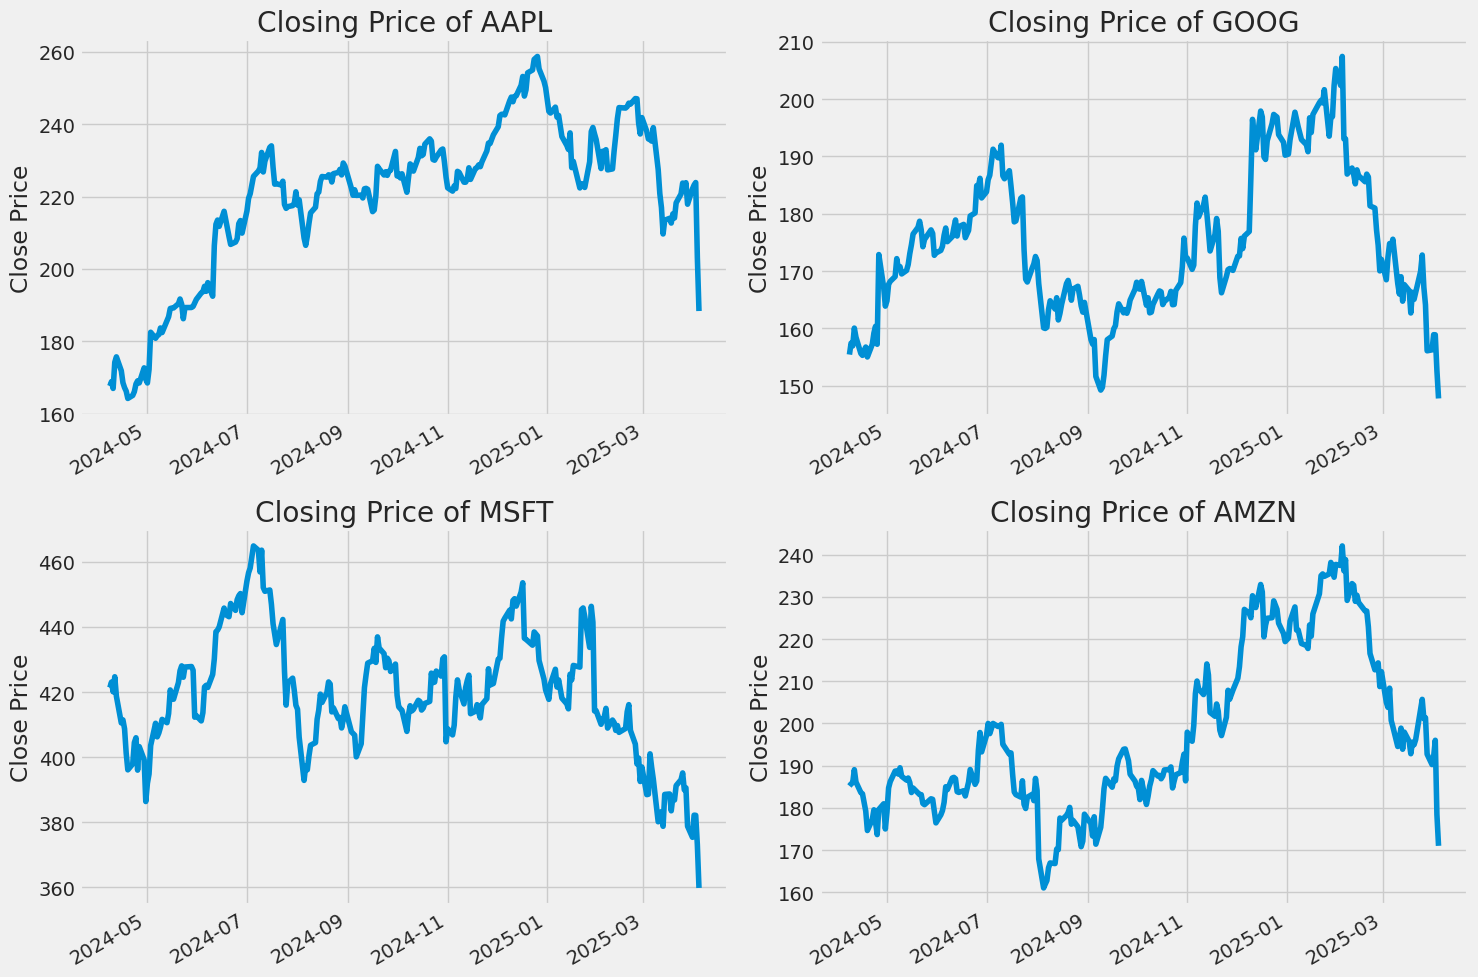

In [13]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=0.95, hspace=0.3)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)

    # Get the ticker symbol from the columns
    ticker = [col[1] for col in company.columns if col[1] != ''][0]

    # Plot the 'Close' price for that ticker
    company[('Close', ticker)].plot()
    plt.ylabel('Close Price')
    plt.xlabel(None)
    plt.title(f"Closing Price of {ticker}")

plt.tight_layout()
plt.show()


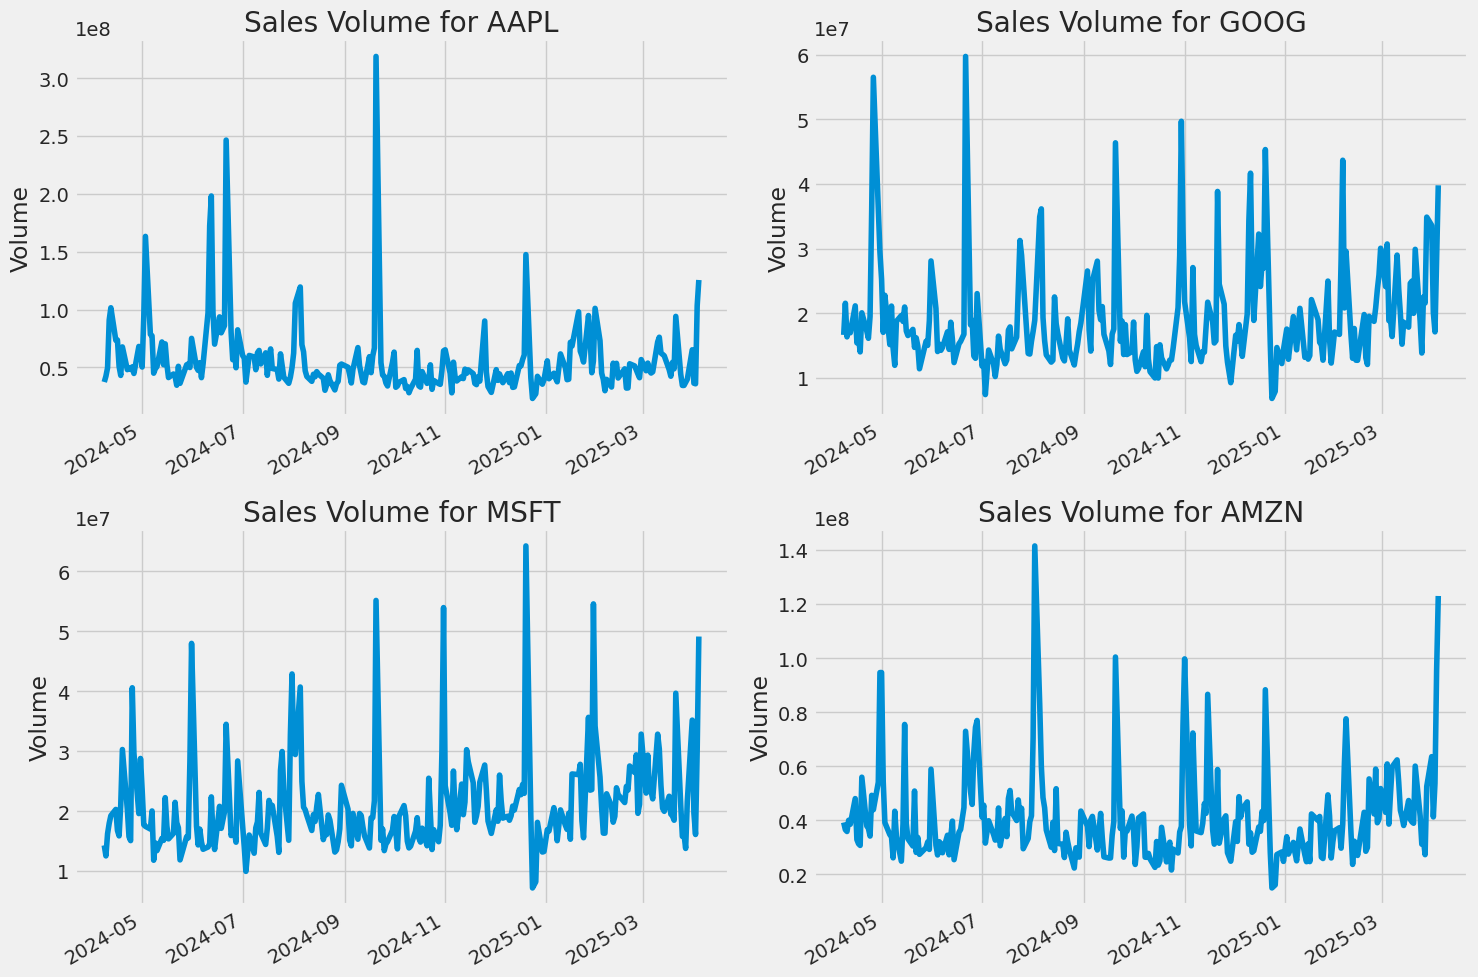

In [14]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=0.95, hspace=0.3)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)

    # Extract ticker name from the MultiIndex columns
    ticker = [col[1] for col in company.columns if col[1] != ''][0]

    # Plot Volume using MultiIndex access
    company[('Volume', ticker)].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {ticker}")

plt.tight_layout()
plt.show()


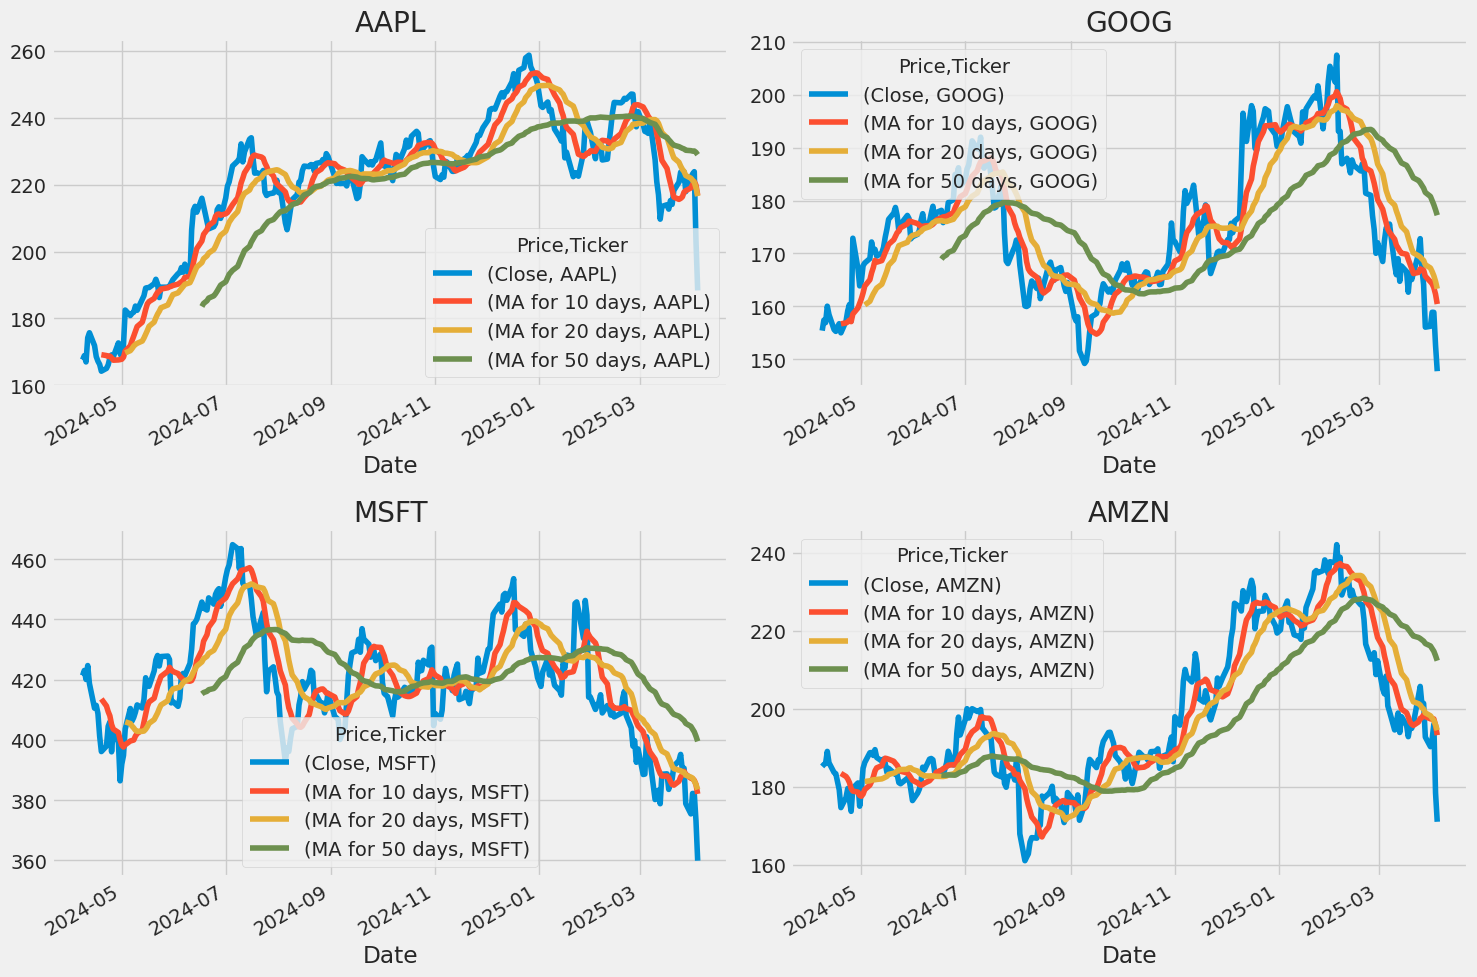

In [15]:
ma_day = [10, 20, 50]

# Add moving averages to each company DataFrame
for ma in ma_day:
    for company in company_list:
        # Extract ticker
        ticker = [col[1] for col in company.columns if col[1] != ''][0]
        column_name = f"MA for {ma} days"
        # Create moving average column for 'Close' price
        company[(column_name, ticker)] = company[('Close', ticker)].rolling(ma).mean()

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

for ax, company in zip(axes.flatten(), company_list):
    # Get ticker
    ticker = [col[1] for col in company.columns if col[1] != ''][0]

    # Create the column list with MultiIndex keys
    cols_to_plot = [
        ('Close', ticker),
        (f'MA for 10 days', ticker),
        (f'MA for 20 days', ticker),
        (f'MA for 50 days', ticker)
    ]

    company[cols_to_plot].plot(ax=ax)
    ax.set_title(ticker)

fig.tight_layout()
plt.show()


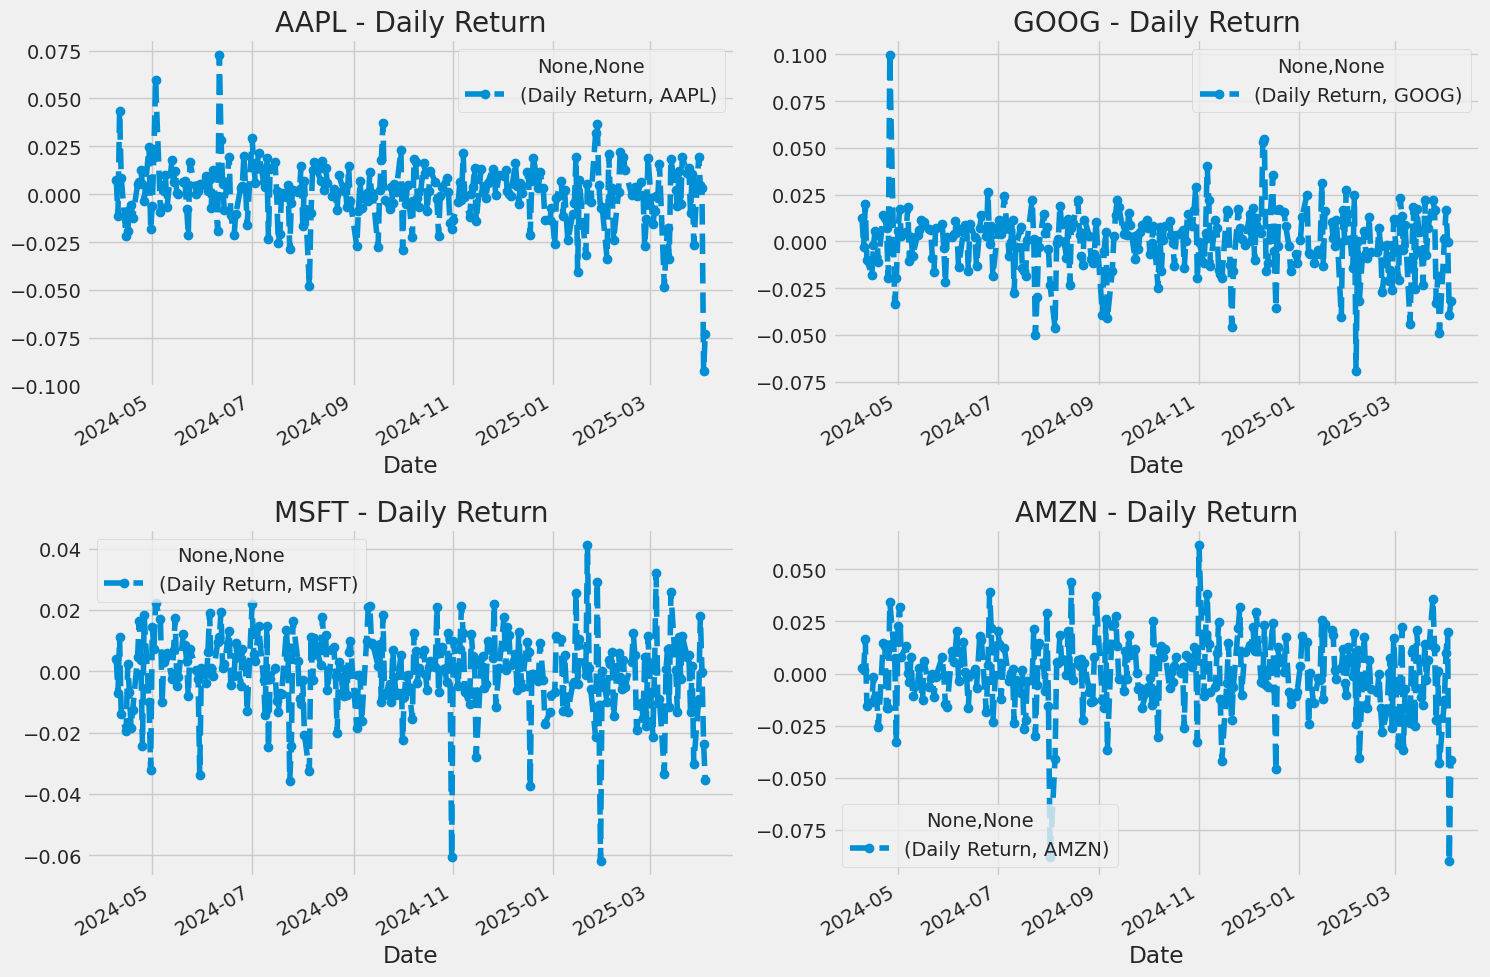

In [16]:
# Calculate daily return
for company in company_list:
    # Extract ticker name
    ticker = [col[1] for col in company.columns if col[1] != ''][0]
    # Create Daily Return based on 'Close' price
    company[('Daily Return', ticker)] = company[('Close', ticker)].pct_change()

# Plot daily returns
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

for ax, company in zip(axes.flatten(), company_list):
    ticker = [col[1] for col in company.columns if col[1] != ''][0]

    company[('Daily Return', ticker)].plot(
        ax=ax, legend=True, linestyle='--', marker='o'
    )
    ax.set_title(f"{ticker} - Daily Return")

fig.tight_layout()
plt.show()


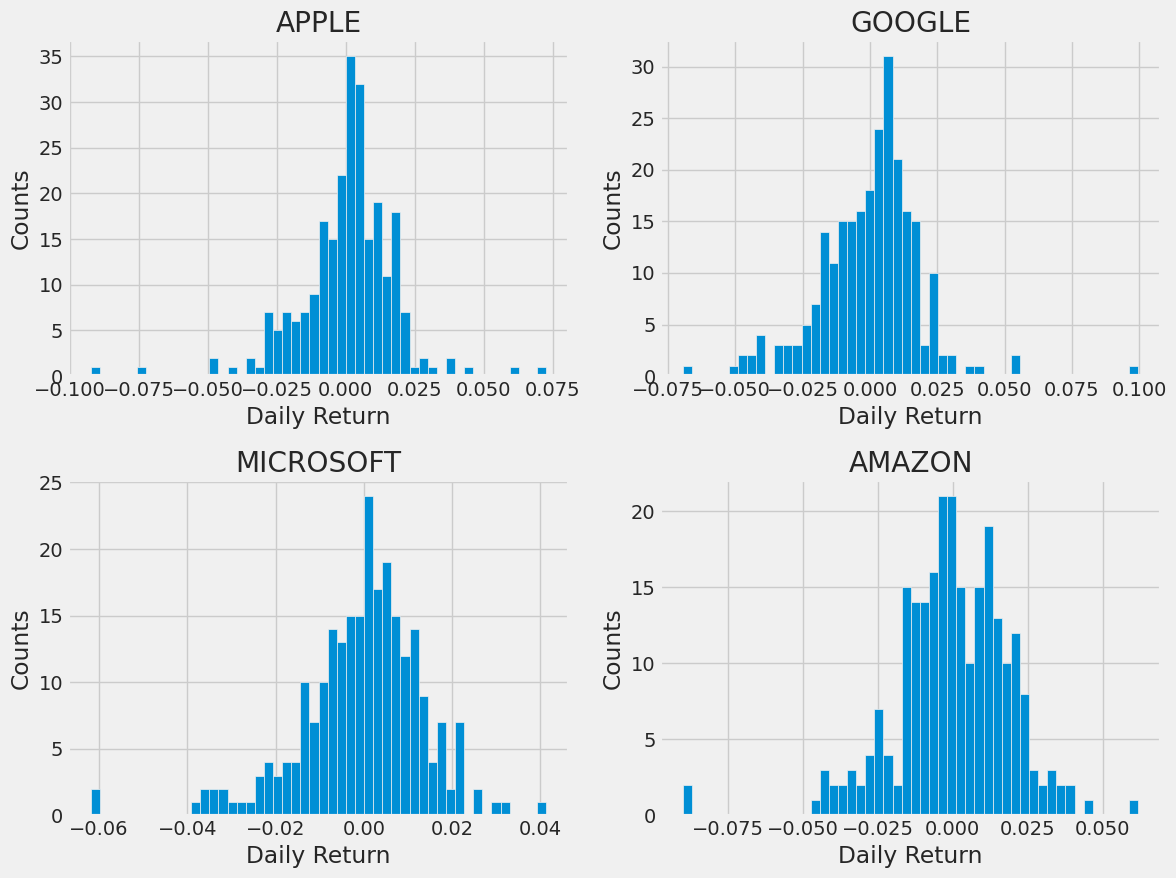

In [17]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)

    # Get the ticker
    ticker = [col[1] for col in company.columns if col[1] != ''][0]

    # Plot histogram of daily return
    company[('Daily Return', ticker)].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()
plt.show()


In [22]:
data = yf.download(tech_list, start=start, end=end)
print(data.columns)


[*********************100%***********************]  4 of 4 completed

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'AMZN'),
            ( 'Close', 'GOOG'),
            ( 'Close', 'MSFT'),
            (  'High', 'AAPL'),
            (  'High', 'AMZN'),
            (  'High', 'GOOG'),
            (  'High', 'MSFT'),
            (   'Low', 'AAPL'),
            (   'Low', 'AMZN'),
            (   'Low', 'GOOG'),
            (   'Low', 'MSFT'),
            (  'Open', 'AAPL'),
            (  'Open', 'AMZN'),
            (  'Open', 'GOOG'),
            (  'Open', 'MSFT'),
            ('Volume', 'AAPL'),
            ('Volume', 'AMZN'),
            ('Volume', 'GOOG'),
            ('Volume', 'MSFT')],
           names=['Price', 'Ticker'])


In [23]:
closing_df = data.xs('Close', level='Price', axis=1)


In [24]:
tech_rets = closing_df.pct_change().dropna()
tech_rets.head()


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2024-04-09,0.007242,0.002592,0.012809,0.003980
2024-04-10,-0.011139,0.001508,-0.003035,-0.007085
2024-04-11,0.043271,0.016671,0.019853,0.011033
2024-04-12,0.008627,-0.015446,-0.009951,-0.014091
2024-04-15,-0.021864,-0.013485,-0.017966,-0.019578


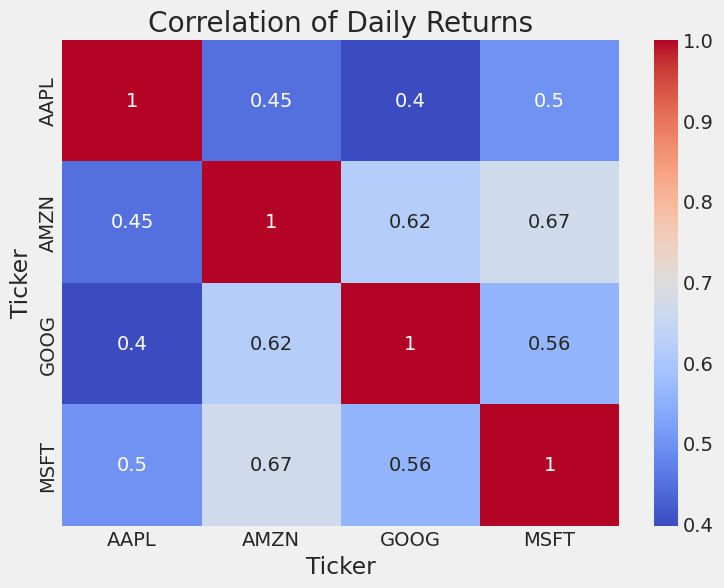

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(tech_rets.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation of Daily Returns')
plt.show()


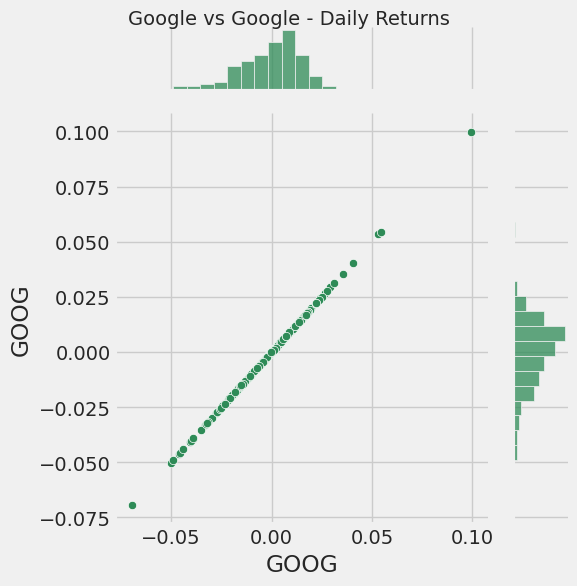

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# This will plot a perfect diagonal since it's the same stock
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

plt.suptitle('Google vs Google - Daily Returns', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # adjust for title
plt.show()


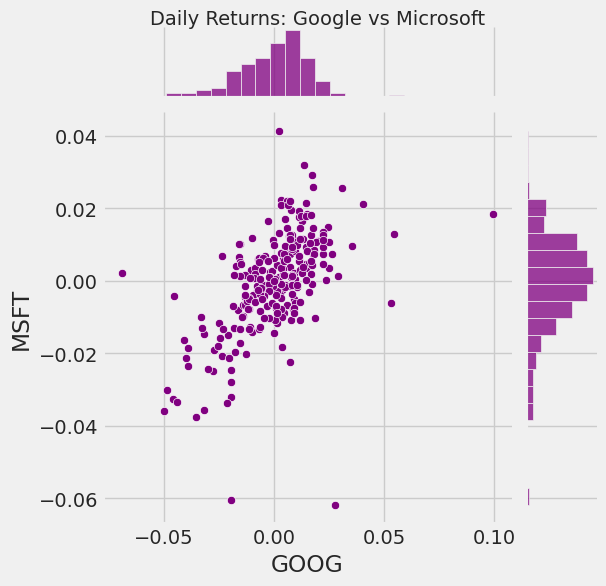

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Simple scatter plot of Google vs Microsoft returns
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter', color='purple')

# Optional: Add title
plt.suptitle('Daily Returns: Google vs Microsoft', fontsize=14)
plt.subplots_adjust(top=0.95)
plt.show()


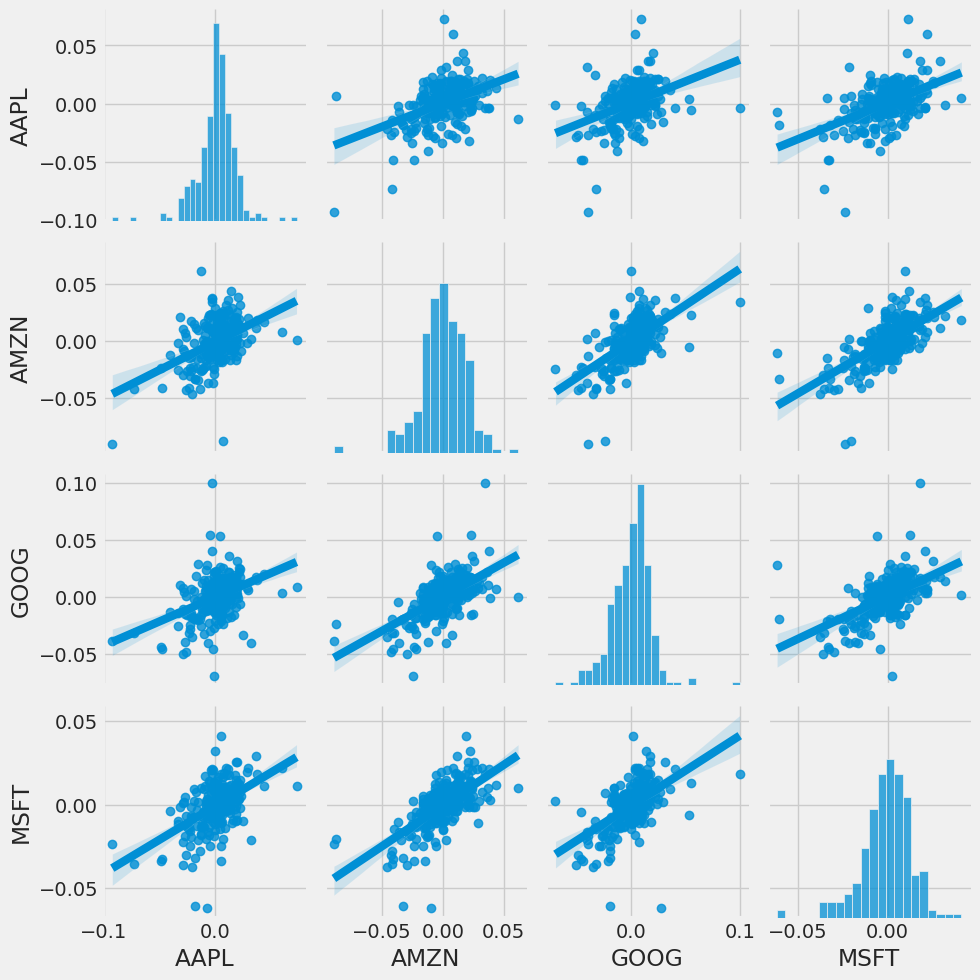

In [28]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

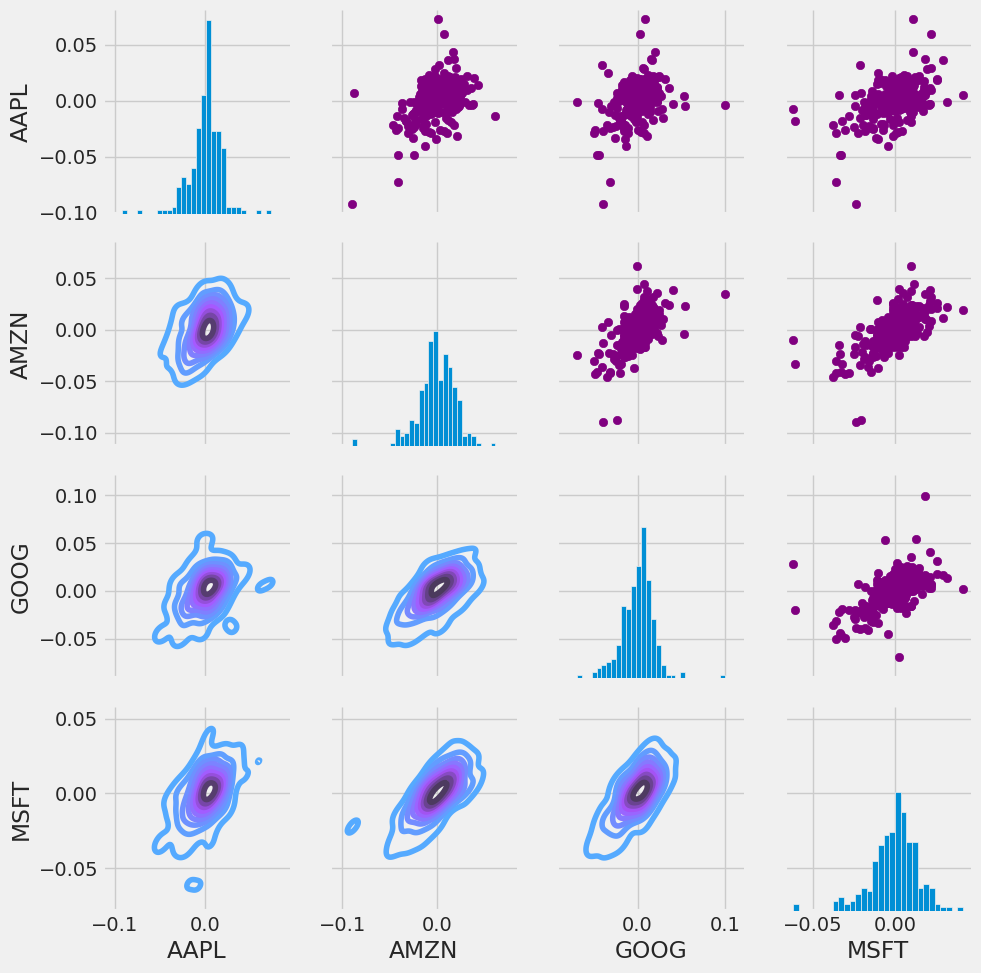

In [29]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

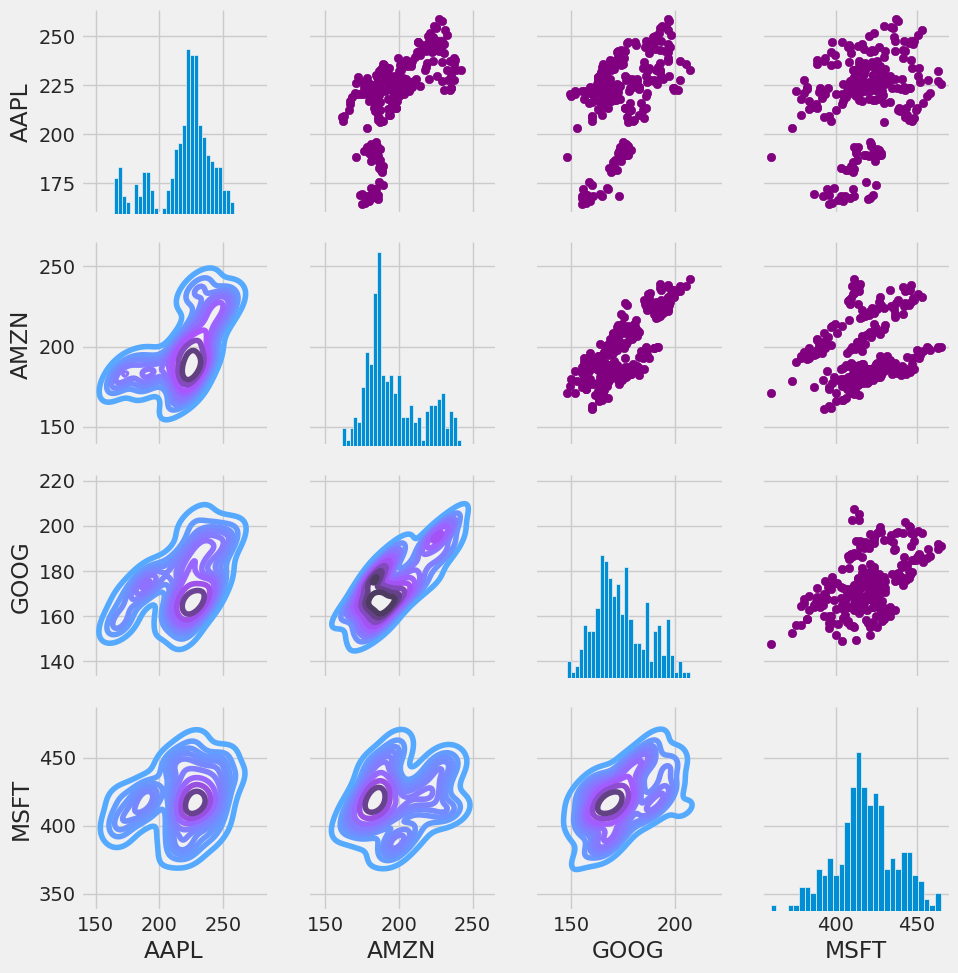

In [30]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

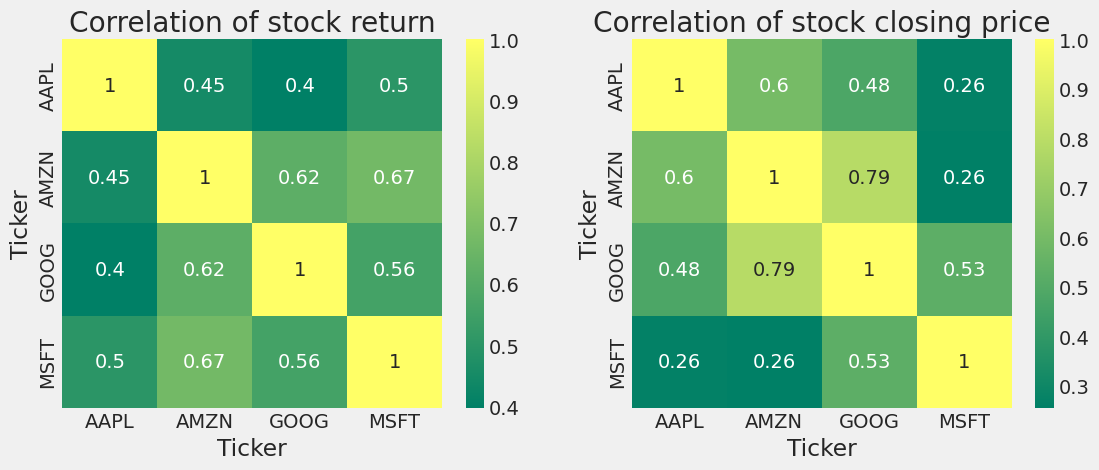

In [31]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

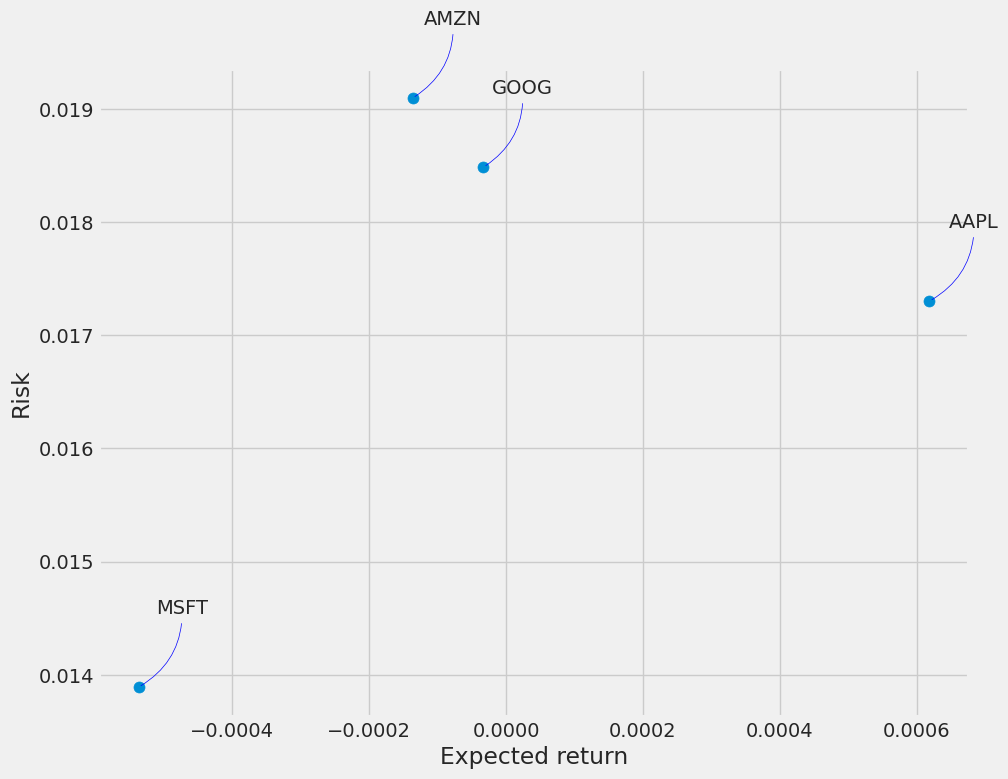

In [32]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [34]:
import yfinance as yf
from datetime import datetime

df = yf.download('AAPL', start='2012-01-01', end=datetime.now())
df.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2012-01-03,12.375389,12.413608,12.308281,12.320319,302220800
2012-01-04,12.441896,12.479213,12.316707,12.338375,260022000
2012-01-05,12.580026,12.595674,12.418724,12.487338,271269600
2012-01-06,12.711536,12.722069,12.615839,12.632390,318292800
2012-01-09,12.691376,12.872539,12.679940,12.804829,394024400


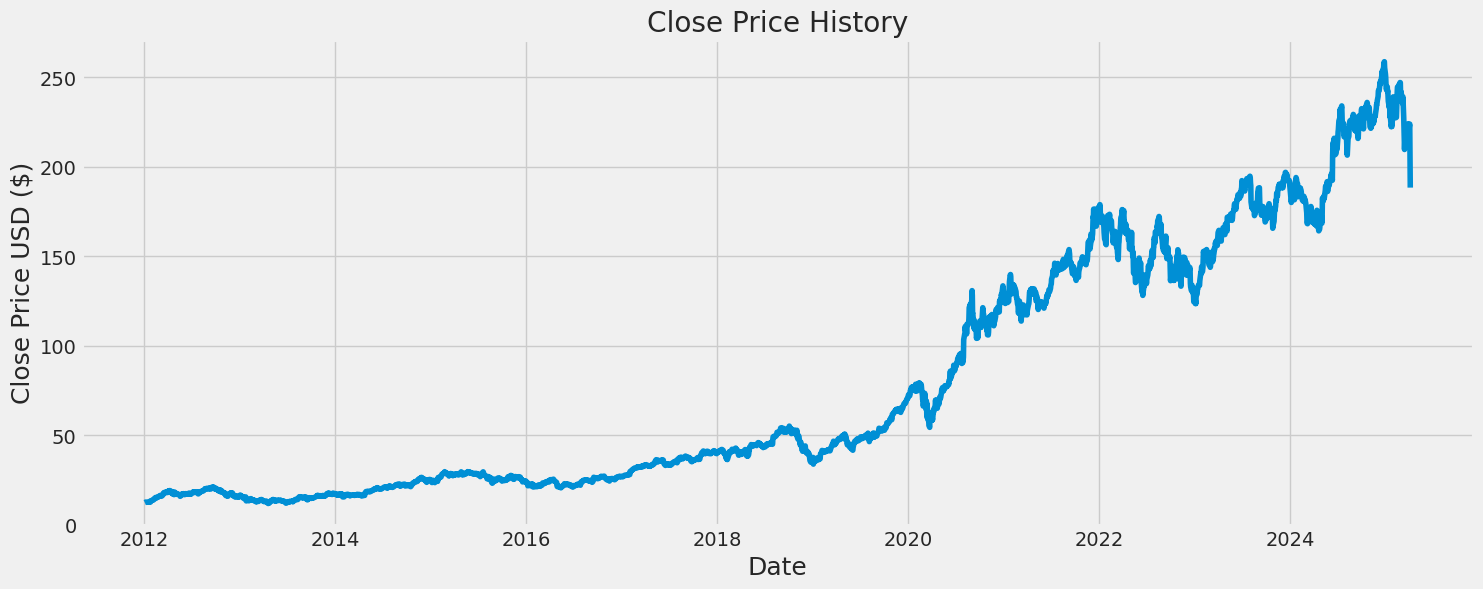

In [35]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [36]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3168

In [38]:
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

# Download data
df = yf.download('AAPL', start='2012-01-01', end=datetime.now())

# Select the 'Close' prices for scaling
dataset = df[['Close']].values  # Ensure it's 2D (needed by sklearn)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

print(scaled_data[:5])


[*********************100%***********************]  1 of 1 completed

[[0.00182108]
 [0.00209056]
 [0.00265025]
 [0.00318307]
 [0.00310138]]


In [39]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00182108],
       [0.00209056],
       [0.00265025],
       ...,
       [0.85881624],
       [0.77494593],
       [0.71494016]])

In [40]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00182108, 0.00209056, 0.00265025, 0.00318307, 0.00310138,
       0.0032855 , 0.00320137, 0.00305992, 0.00286727, 0.00346351,
       0.00400121, 0.00383541, 0.00292703, 0.00379394, 0.00294043,
       0.0061411 , 0.00589358, 0.0062167 , 0.00691537, 0.00733846,
       0.0073031 , 0.00717265, 0.00772865, 0.00825172, 0.00884429,
       0.00980145, 0.0118121 , 0.01184255, 0.01296187, 0.01379833,
       0.01236077, 0.01291436, 0.01290337, 0.01445555, 0.01423485,
       0.0146433 , 0.01537734, 0.01578583, 0.01696245, 0.0178196 ,
       0.01806713, 0.01815369, 0.01668812, 0.01633449, 0.01638693,
       0.01776474, 0.01815248, 0.01898525, 0.02094835, 0.02356739,
       0.02307721, 0.02307847, 0.02497202, 0.0255646 , 0.02514276,
       0.02475743, 0.02435628, 0.02568896, 0.02660346, 0.02698631])]
[np.float64(0.026040152156462763)]

[array([0.00182108, 0.00209056, 0.00265025, 0.00318307, 0.00310138,
       0.0032855 , 0.00320137, 0.00305992, 0.00286727, 0.00346351,
       0.00400121, 0.0

In [41]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3108/3108 ━━━━━━━━━━━━━━━━━━━━ 161s 51ms/step - loss: 0.0027


In [42]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step


np.float64(5.701868895771466)

In [45]:
print(data.columns)


MultiIndex([], names=['Price', 'Ticker'])


In [47]:
import yfinance as yf


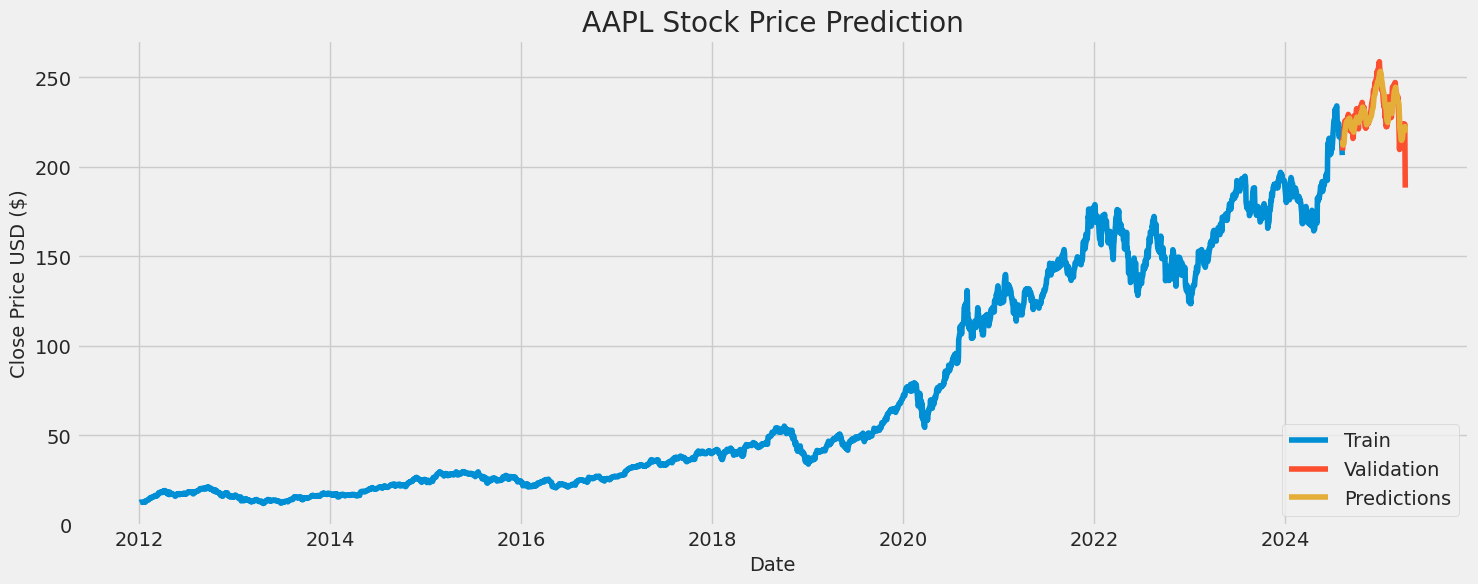

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

# Set your ticker symbol
ticker = 'AAPL'

# Extract the 'Close' column for the ticker
close_col = ('Close', ticker)
train = data[close_col][:training_data_len]
valid = data[close_col][training_data_len:]

# Flatten predictions to 1D array
predictions_flat = predictions.flatten()

# Create a new DataFrame with actual and predicted values
valid_df = pd.DataFrame({
    'Actual': valid.values,
    'Predictions': predictions_flat
}, index=valid.index)

# Plotting
plt.figure(figsize=(16, 6))
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price USD ($)', fontsize=14)
plt.plot(train, label='Train')
plt.plot(valid_df['Actual'], label='Validation')
plt.plot(valid_df['Predictions'], label='Predictions')
plt.legend(loc='lower right')
plt.show()


In [54]:
# Show the valid and predicted prices
valid

,Close
,AAPL
Date,
2024-08-07,209.117188
2024-08-08,212.595474
2024-08-09,215.515686
2024-08-12,217.052292
2024-08-13,220.784073
...,...
2025-03-31,222.130005
2025-04-01,223.190002


In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming your predictions are in valid_df
y_true = valid_df['Actual']
y_pred = valid_df['Predictions']

# Evaluation Metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Print the results
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")

MAE: 4.27
MSE: 32.51
RMSE: 5.70
R² Score: 0.7395
MAPE: 1.87%


In [83]:
actual_prices = valid_df['Actual'].values
predicted_prices = valid_df['Predictions'].values

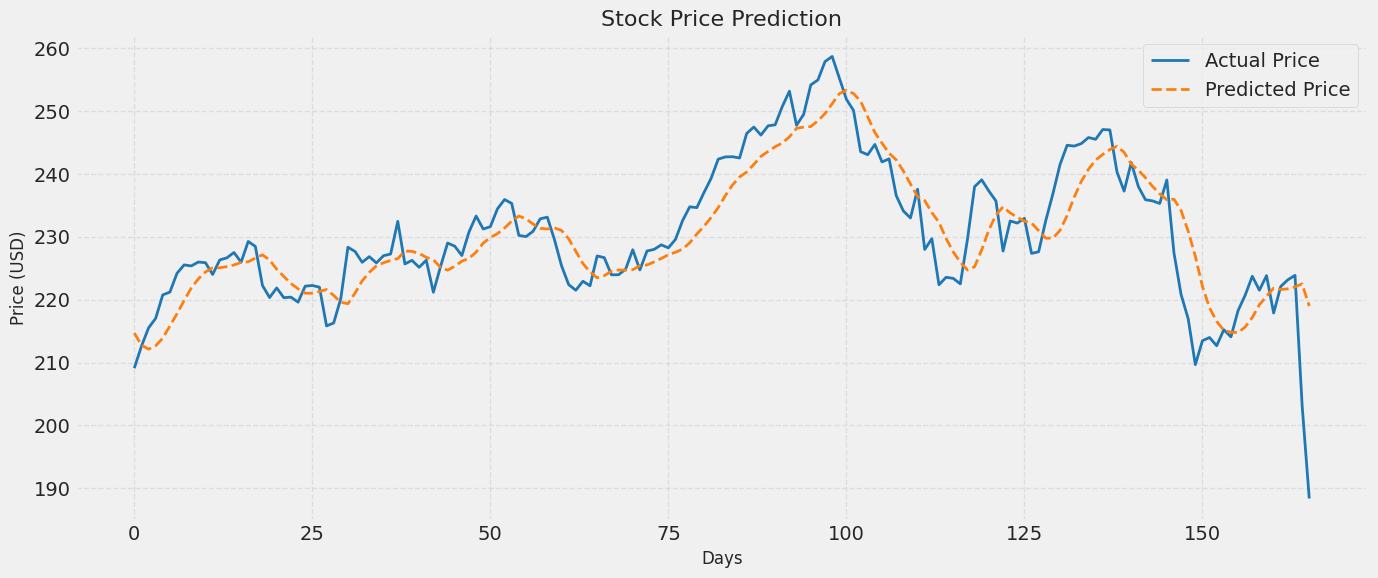

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(actual_prices, label='Actual Price', color='tab:blue', linewidth=2)
plt.plot(predicted_prices, label='Predicted Price', color='tab:orange', linestyle='--', linewidth=2)
plt.title('Stock Price Prediction', fontsize=16)
plt.xlabel('Days', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [55]:
# Install required packages
!pip install transformers yfinance nltk

import yfinance as yf
from transformers import pipeline
from datetime import datetime, timedelta
import pandas as pd

# Example News Headlines (you can later replace this with real-time news)
headlines = [
    "Apple stock surges after strong quarterly earnings",
    "Concerns rise over Apple's supply chain disruptions",
    "Apple announces new AI chip, stock spikes",
]

# Load FinBERT sentiment analysis pipeline
sentiment_analyzer = pipeline("sentiment-analysis", model="yiyanghkust/finbert-tone", tokenizer="yiyanghkust/finbert-tone")

# Analyze sentiment
sentiment_scores = sentiment_analyzer(headlines)

# Format result
sentiment_df = pd.DataFrame(sentiment_scores)
print(sentiment_df)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

Device set to use cpu


      label     score
0  Positive  0.999999
1  Negative  0.999999
2  Positive  0.819244


In [56]:
# Simulate dates (you'll later replace this with real news dates)
base_date = datetime.today()
dates = [base_date - timedelta(days=i) for i in range(len(headlines))]
sentiment_df['date'] = dates


In [57]:
def convert_label_to_score(label):
    if label == 'POSITIVE':
        return 1
    elif label == 'NEGATIVE':
        return -1
    else:
        return 0

sentiment_df['sentiment_score'] = sentiment_df['label'].apply(convert_label_to_score) * sentiment_df['score']


In [58]:
daily_sentiment = sentiment_df.groupby('date')['sentiment_score'].mean().reset_index()
daily_sentiment.set_index('date', inplace=True)


In [59]:
ticker = 'AAPL'
start_date = (base_date - timedelta(days=7)).strftime('%Y-%m-%d')
end_date = base_date.strftime('%Y-%m-%d')

stock_data = yf.download(ticker, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed


In [61]:
# Flatten multi-index columns
stock_data.columns = ['_'.join(col).strip() for col in stock_data.columns.values]


In [62]:
stock_data.index = pd.to_datetime(stock_data.index)
daily_sentiment.index = pd.to_datetime(daily_sentiment.index)


In [63]:
merged_df = stock_data.join(daily_sentiment, how='left')
merged_df['sentiment_score'].fillna(0, inplace=True)


<ipython-input-63-0ac35d6edee4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['sentiment_score'].fillna(0, inplace=True)


In [66]:
merged_df['sentiment_score'] = merged_df['sentiment_score'].fillna(0)


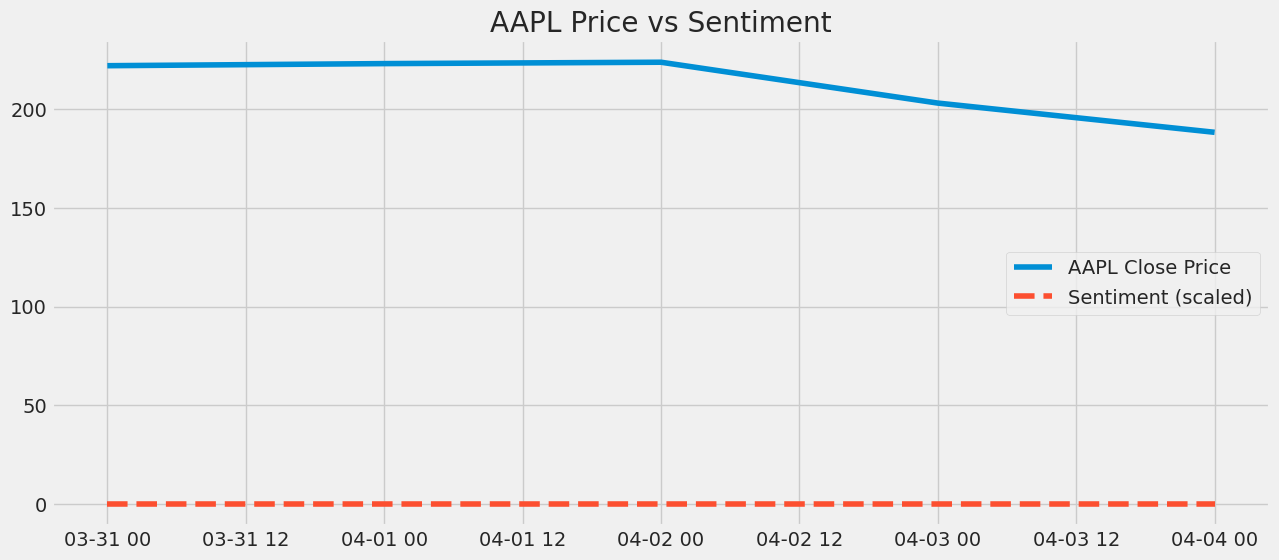

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(merged_df['Close_AAPL'], label='AAPL Close Price')
plt.plot(merged_df['sentiment_score'] * 50, label='Sentiment (scaled)', linestyle='--')
plt.title('AAPL Price vs Sentiment')
plt.legend()
plt.show()


In [72]:
merged_df['sentiment_score'] = merged_df['sentiment_score'] * 10  # amplify before scaling


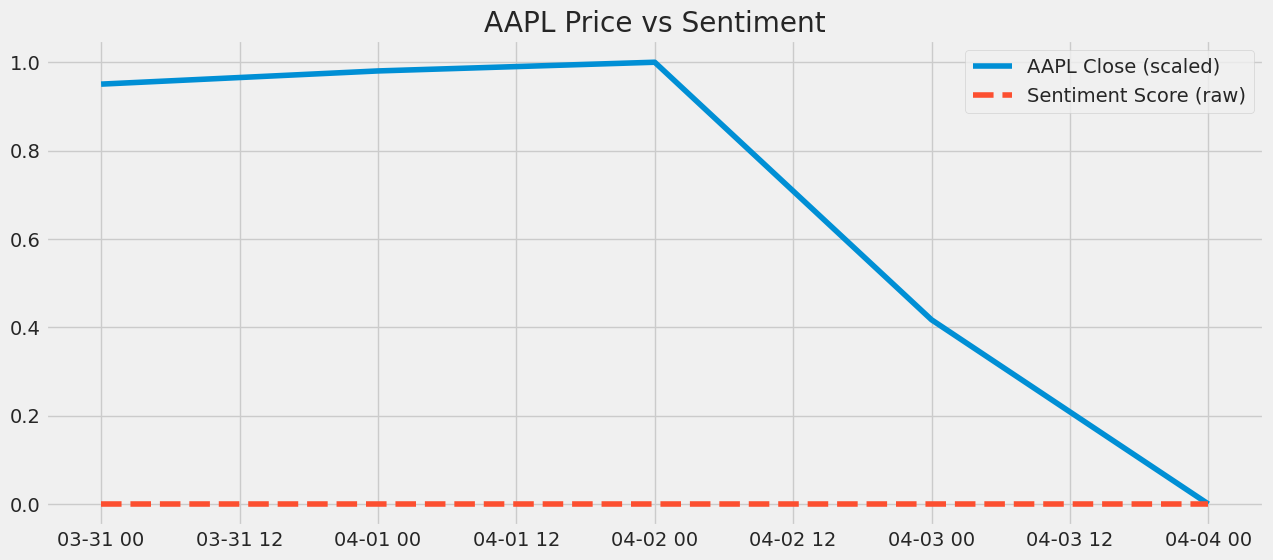

In [73]:
plt.figure(figsize=(14,6))
plt.plot(merged_df['Close_AAPL_scaled'], label='AAPL Close (scaled)')
plt.plot(merged_df['sentiment_score'], label='Sentiment Score (raw)', linestyle='--')
plt.title('AAPL Price vs Sentiment')
plt.legend()
plt.show()


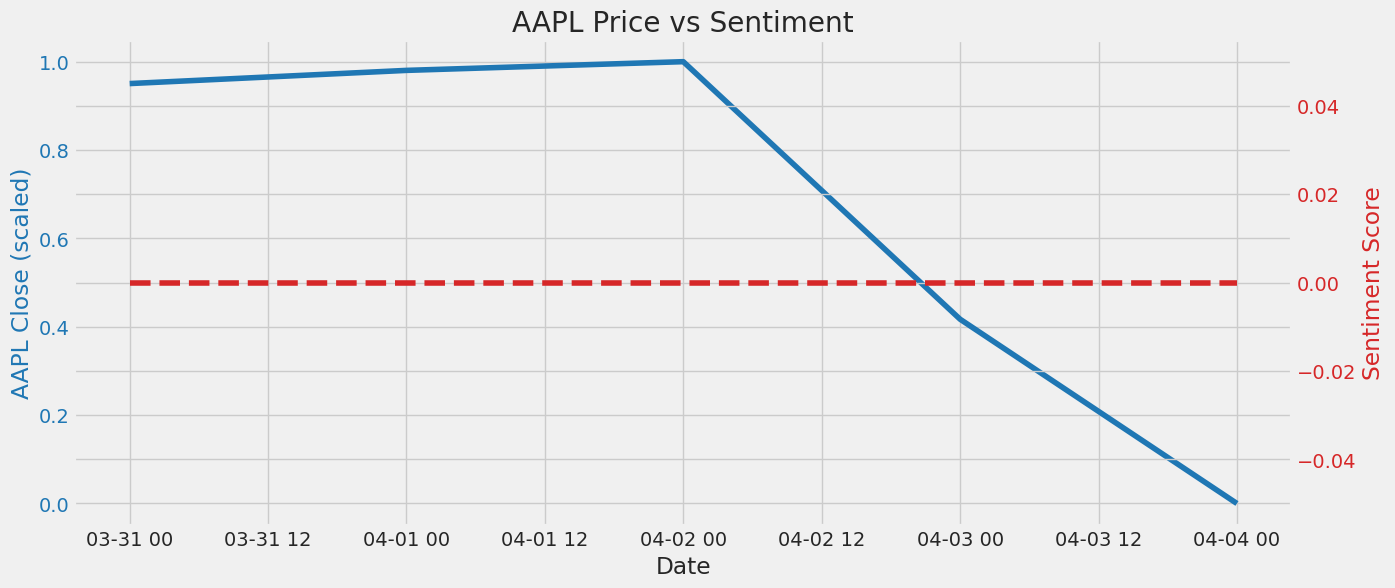

In [74]:
fig, ax1 = plt.subplots(figsize=(14,6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('AAPL Close (scaled)', color=color)
ax1.plot(merged_df.index, merged_df['Close_AAPL_scaled'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # second y-axis
color = 'tab:red'
ax2.set_ylabel('Sentiment Score', color=color)
ax2.plot(merged_df.index, merged_df['sentiment_score'], color=color, linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('AAPL Price vs Sentiment')
plt.show()
